In [42]:

import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install matplotlib


     ---------------------------------------- 7.6/7.6 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 577.2 kB/s eta 0:00:00
     ------------------------------------ 163.0/163.0 kB 697.4 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.9 MB/s eta 0:00:00


In [2]:
pip install -U scikit-learn


  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [6]:
# Pre-procesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
dataset = np.loadtxt("dataset.csv", delimiter=",")

In [15]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# Modelos en Keras (incluyendo Droput y Early Stopping)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [32]:
# Función para graficar resultados
def graficar_resultados(historia):
	plt.subplot(1,2,1)
	plt.plot(historia.history['loss'])
	plt.plot(historia.history['val_loss'])
	plt.ylabel('Pérdida')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	plt.subplot(1,2,2)
	plt.plot(historia.history['accuracy'])
	plt.plot(historia.history['val_accuracy'])
	plt.ylabel('Precisión')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	ax = plt.gca()
	ax.yaxis.set_label_position("right")
	ax.yaxis.tick_right()

	plt.show()

In [45]:
 #Lectura y pre-procesamiento de datos

dataset = np.loadtxt("dataset.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Creación, entrenamiento y validación de los modelos

np.random.seed(100)
# 1. Modelo de base: 2 capas ocultas con 1000 y 250 neuronas
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

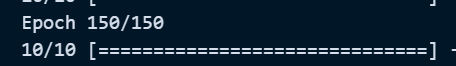
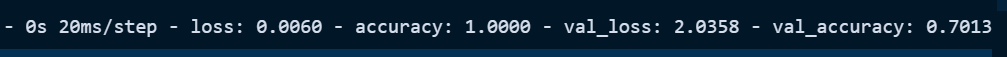

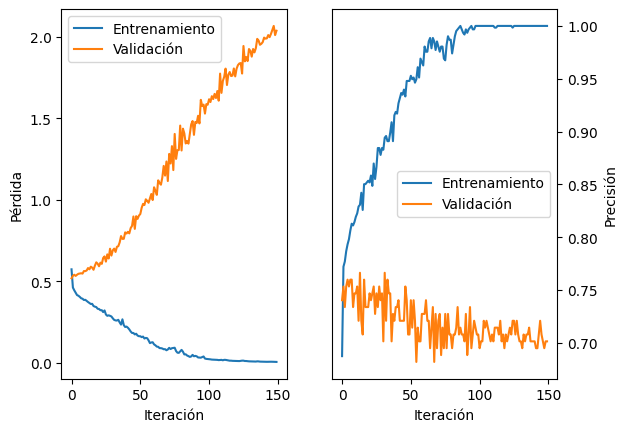

In [35]:
graficar_resultados(historia)


Una vez realizado el entrenamiento podemos observar el comportamiento del error y de la precisión.
En el caso del set de entrenamiento el error se reduce progresivamente. Sin embargo, con el set de validación el error se incrementa progresivamente! Esto es una señal clara de Overfitting, lo que se puede comprobar al verificar la precisión: 100% con el set de entrenamiento y tan sólo 71% con el de validación.

In [ ]:
# 2. Modelo simplificado: 1 capa oculta con 100 neuronas
model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

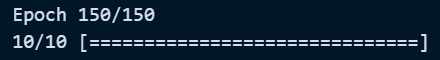
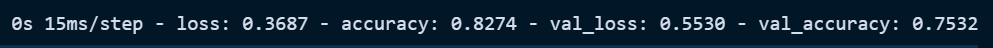

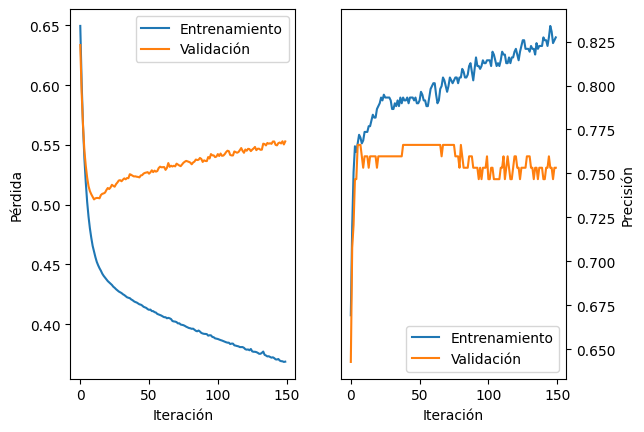

In [37]:
graficar_resultados(historia)

Al entrenar el modelo y validarlo, vemos que se ha sacrificado la precisión del set de entrenamiento (pues ahora bajó a aproximadamente el 83%), pero se ha incrementado la del set de validación (pasando de 71 a 73%), reduciendo así el overfitting

In [ ]:
# 3. Modelo base con dropout
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)


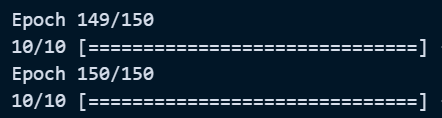
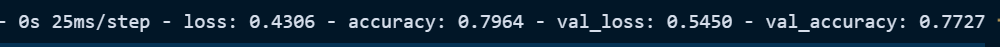

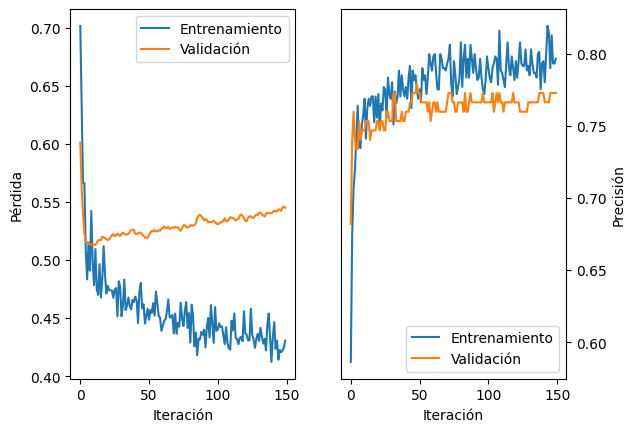

In [39]:
graficar_resultados(historia)

En las líneas de código anteriores, se usaron valores de Dropout correspondientes al 90% (model.add(Dropout(0.9))) y al 80% (model.add(Dropout(0.8))) en cada una de las capas del modelo base inicial.

Al entrenar el modelo se observa un incremento en la precisión del set de validación, llegando al 75%

In [ ]:
# 4. Modelo con droput y early stopping
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1, callbacks=[early_stop])

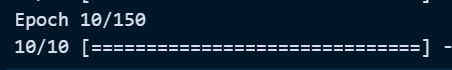
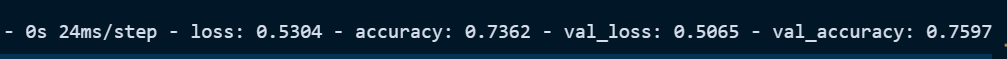

Si volvemos al modelo entrenado con Dropout, observamos que el error de validación comienza a incrementarse después la iteración 10, aproximadamente.
La idea del Early stopping es practicamente detener el entrenamiento en el momento que se observe un incremento en el valor del error de validación. Al hacer esto se logra entrenar el modelo para que este error sea mínimo y, por tanto, su precisión sea máxima, reduciendo así el overfitting.

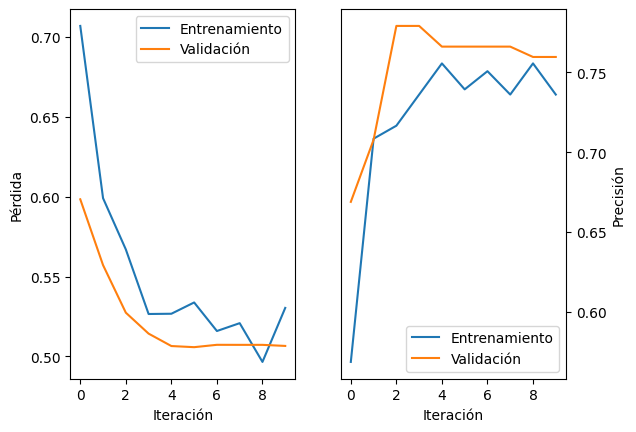

In [41]:
graficar_resultados(historia)

Al usar el early stopping vemos que el entrenamiento se detiene tras 13 iteraciones. Sin embargo es en la iteración 9 en donde el error es mínimo, y por tanto los coeficientes finales del modelo corresponderán a los calculados en esta iteración

En este caso los valores obtenidos para la precisión con los sets de entrenamiento y validación son de aproximadamente 75 y 77%. Es decir, que con este cuarto modelo entrenado ¡prácticamente no existe overfitting!
